# KELOMPOK 11

DATASET = KARTU_KREDIT

Nama Anggota Kelompok:
1. Luh Putu Deswinta Dharmariani (2208541009)
2. Ni Kadek Yuni Antari (2208541018)
3. Ni Kadek Intan Dwi Pratiwi (2208541023)

Pada project ini kelompok 11 akan menganalisis credit card fraud. Jadi akan diselidiki variabel-variabel yang ada pada data apakah bisa untuk menentukan fraud atau tidak.

## Import Library

In [1]:
#pertama-tama yang harus dilakukan adalah mengimport library-library yang dibutuhkan untuk membantu proses analisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Membaca Dataset Kartu_Kredit

In [7]:
#akan memanggil data kartu_kredit untuk menampilkannya
#pastikan perangkat tersambung dengan internet
#kemudian panggil data kartu_kredit dari link (pada repositories Pak Eka Dwipayana) dengan bantuan pandas
data_kartu_kredit = pd.read_csv('https://raw.githubusercontent.com/imdwipayana/DATA/main/Dataset%20Final%20Project%202023/Kartu_Kredit/fraud_cc.csv')

In [8]:
#cek ukuran data
data_kartu_kredit.shape

(1000000, 8)

In [9]:
#memanggil data lebih sedikit dari urutan data teratas
data_kartu_kredit.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [19]:
#deskripsi variabel
#distance_from_home = jarak dari rumah tempat transaksi
#distance_from_last_transaction = jarak transaksi terakhir
#ratio_to_median_purchase_price = sekali transaksi rata ratanya berapa
#repeat_retailer = ngulang lagi gak belanja di tempat yang sama?
#used_chip = menggunakan chip
#used_pin_number = menggunakan nomor pin
#online_order = pake pesanan online kaya tokopedia atau shopee gak?
#fraud = penipuan

In [10]:
#memanggil data lebih sedikit dari urutan data teratas
data_kartu_kredit.head(50)
#untuk mencetak data dari baris urutan ke 0 sampai urutan ke 49

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [11]:
#memanggil data dari urutan terakhir
data_kartu_kredit.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [13]:
#menampilkan deskriptif statistik data untuk mengetahui lebih detail
data_kartu_kredit.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Melihat isi dari kolom yang ada pada dataset
data_kartu_kredit.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

## Informasi Data

In [14]:
#untuk mengetahui informasi mengenai data kartu kredit
data_kartu_kredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [16]:
#melihat tipe data dari variabel-variabel pada data_kartu_kredit
data_kartu_kredit.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

Ternyata semua datanya bertipe float, jadi tidak perlu lagi di kategorikan.

In [18]:
# mengecek apakah terdapat data yang kosong
data_kartu_kredit.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Ternyata tidak terdapat data yang kosong, maka tidak ada data yang perlu di drop atau dihilangkan.

In [50]:
#Mencoba mengecek jumlah kejadian penipuan
print(data_kartu_kredit['fraud'].value_counts())
print('\n')
#Menormalisasi data
print(data_kartu_kredit['fraud'].value_counts(normalize=True))

0.0    912597
1.0     87403
Name: fraud, dtype: int64


0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64


## Diagram Batang dan Diagram Lingkaran dari Jumlah Transaksi Normal dan Fraud

### Diagram Batang

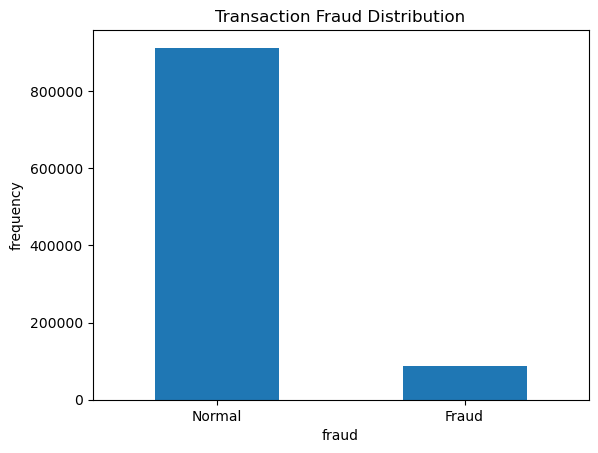

In [52]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data_kartu_kredit['fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Fraud Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("fraud")
plt.ylabel("frequency");

### Diagram Lingkaran

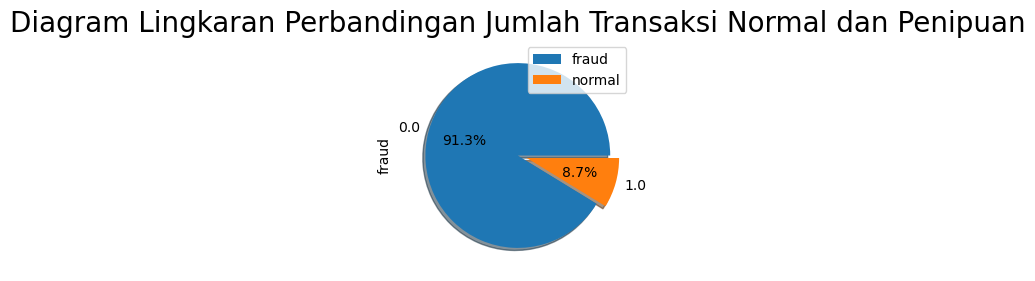

In [53]:
data_kartu_kredit["fraud"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(3,3),autopct='%1.1f%%',shadow=True)
plt.title("Diagram Lingkaran Perbandingan Jumlah Transaksi Normal dan Penipuan",fontsize=20)
plt.legend(["fraud", "normal"])
plt.show()

### Plot Hubungan Berpasangan dalam Kumpulan Data

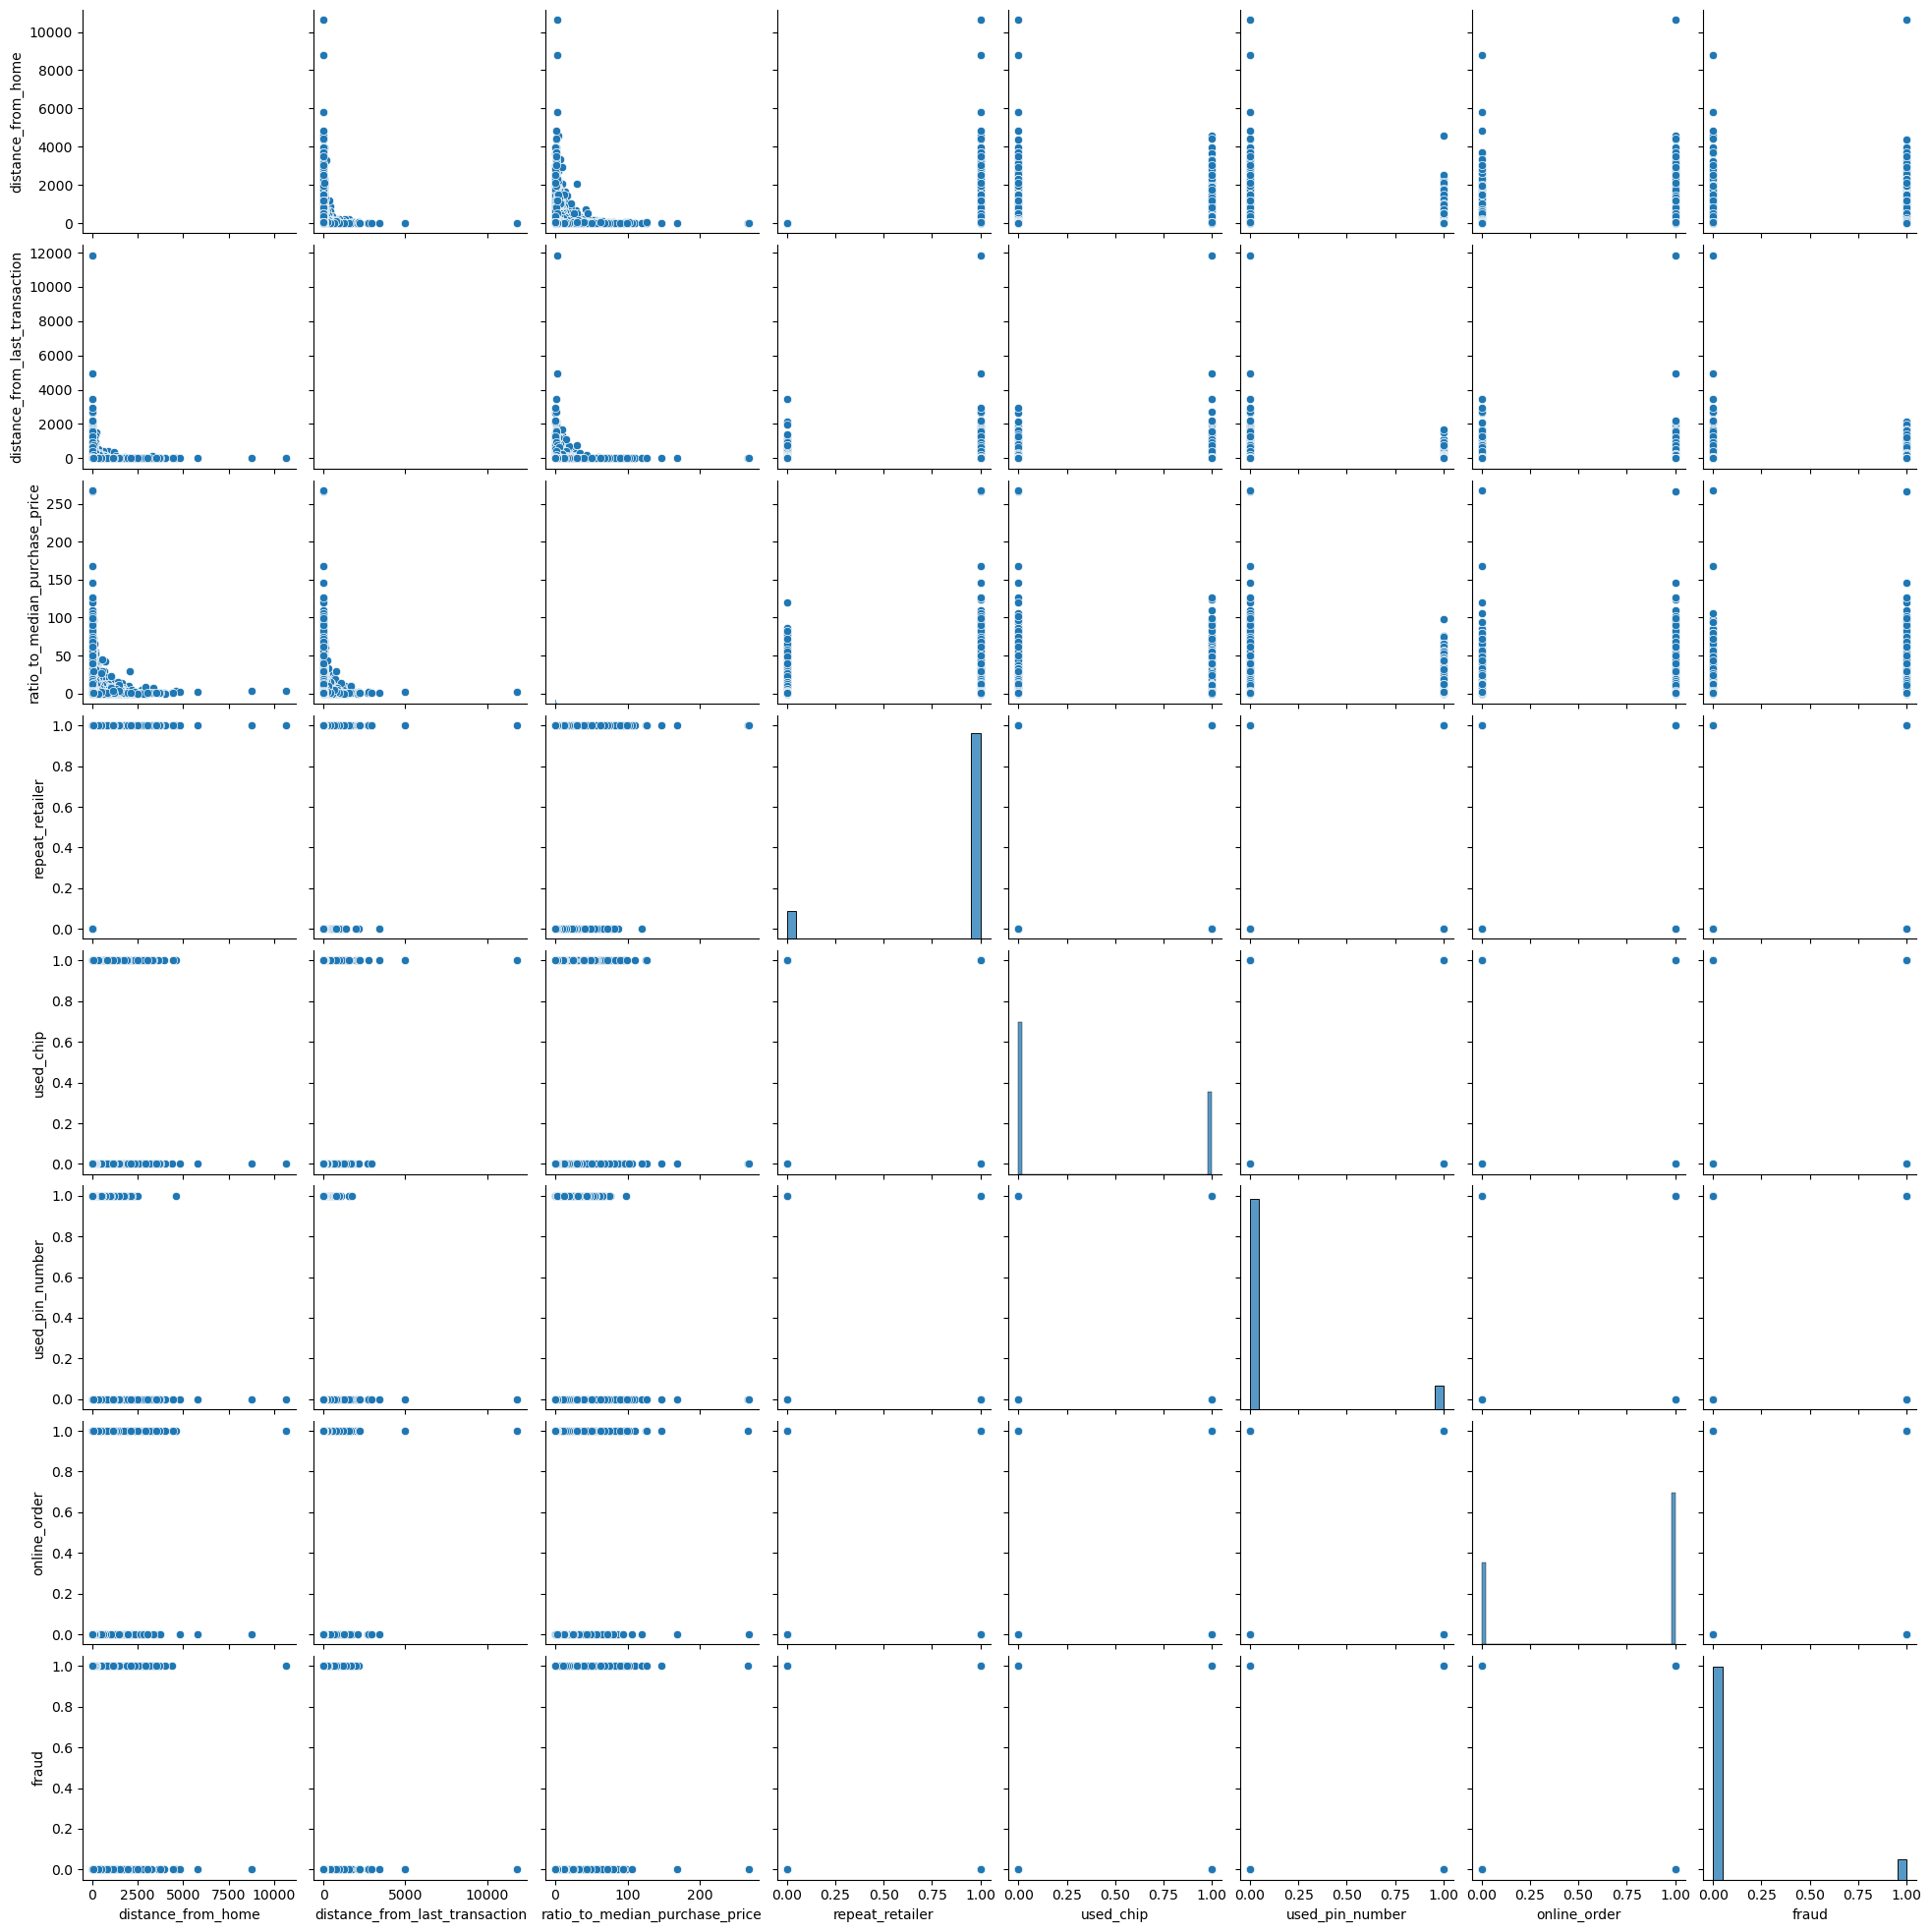

In [54]:
sns.pairplot(data_kartu_kredit)

## Normalisasi Data
Normalisasi digunakan untuk menghilangkan bias pada data sehingga data dengan range yang besar akan memberikan efek yang setara dengan data range lebih kecil.

In [21]:
# Normalisasi data dalam bentuk numerik
# agar jaraknya tidak terlalu jauh
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(data_kartu_kredit)
data_normalisasi = pd.DataFrame(d, columns=data_kartu_kredit.columns)
data_normalisasi.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0,0.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0,0.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0,0.0


In [22]:
data_normalisasi.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.002504,0.000425,0.006795,0.881536,0.350399,0.100608,0.650552,0.087403
std,0.006150,0.002181,0.010454,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000364,0.000025,0.001760,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000937,0.000084,0.003709,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.002421,0.000283,0.007812,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Melakukan korelasi pada data yang sudah dinormalisasi
data_normalisasi.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


In [24]:
# Membagi data menjadi X dan y
X = data_normalisasi.drop(['fraud'], axis = 1)
y = data_normalisasi['fraud']

In [31]:
#lihat data yang sebagai X
X.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0


In [32]:
#lihat data yang sebagai y
y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: fraud, dtype: float64

## Membagi Menjadi Data Training and Testing

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
# Diambil data secara acak untuk di test sebesar 20% dari jumlah data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [33]:
#banyak X_train
len(X_train)

800000

In [35]:
#lihat data X_train
X_train.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
91145,0.003785,0.000477,0.001608,1.0,0.0,0.0,0.0
302954,0.000066,0.000061,0.001432,0.0,0.0,0.0,0.0
372360,0.002513,0.000045,0.002921,1.0,1.0,0.0,1.0
550918,0.000486,0.000024,0.007633,1.0,0.0,0.0,0.0
634348,0.002652,0.000028,0.017992,1.0,0.0,0.0,1.0


In [34]:
#banyak y_train
len(X_test)

200000

In [36]:
#lihat data y_train
y_train.head(5)

91145     0.0
302954    0.0
372360    0.0
550918    0.0
634348    1.0
Name: fraud, dtype: float64

## Menggunakan Regresi Logistik

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model_lr = LogisticRegression()

In [39]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
model_lr.score(X_test,y_test)

0.945

## KFold Regresi Logistik

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [45]:
score_lr = cross_val_score(model_lr, X, y, cv = k_fold, n_jobs = 1, scoring = 'accuracy')
print(score_lr)

[0.94553 0.94655 0.94465 0.94466 0.94512 0.94565 0.9459  0.94532 0.94536
 0.94607]


In [46]:
score_lr.mean()*100

94.5481

## Menggunakan K-Nearest Neighbors (KNN)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
model_knn.score(X_test,y_test)

0.99905

In [47]:
score_knn = cross_val_score(model_knn,X,y,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score_knn)

[0.99907 0.9989  0.99897 0.99923 0.99907 0.99901 0.99924 0.99919 0.99909
 0.99926]


In [48]:
score_knn.mean() * 100

99.9103

Dari model yang digunakan yaitu menggunakan Regresi Logistik didapat tingkat akurasinya adalah 94.5481 dan menggunakan KNN didapat tingkat akurasinya adalah 99.9103 Sehingga dapat dikatakan dengan menggunakan KNN hasil analisisnya memiliki tingkat akurasi yang lebih baik.